# Lecture 2

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Logistic Regression

In [ ]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_tensor = data.to_numpy()
print(data_tensor.shape)
print(data_tensor)

(768, 9)
[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]


In [ ]:
import numpy as np
np.random.shuffle(data_tensor)
print(data_tensor)

[[  4.    147.     74.    ...   0.385  30.      0.   ]
 [  0.    126.     84.    ...   0.52   24.      0.   ]
 [  6.    147.     80.    ...   0.178  50.      1.   ]
 ...
 [  9.    152.     78.    ...   0.893  33.      1.   ]
 [  3.    130.     64.    ...   0.314  22.      0.   ]
 [  0.    173.     78.    ...   1.159  58.      0.   ]]


### Train-Test Split

In [ ]:
train_data_percentage = 0.7
train_data_len = int(len(data_tensor) * train_data_percentage)
print(train_data_len)

537


In [ ]:
train_data = data_tensor[:train_data_len]
test_data = data_tensor[train_data_len:]

In [ ]:
train_data_x = train_data[:, :-1]
print(train_data_x.shape)
print(train_data_x)

(537, 8)
[[  8.    133.     72.    ...  32.9     0.27   39.   ]
 [ 14.    175.     62.    ...  33.6     0.212  38.   ]
 [  1.     79.     80.    ...  25.4     0.583  22.   ]
 ...
 [  5.     97.     76.    ...  35.6     0.378  52.   ]
 [  1.     81.     74.    ...  46.3     1.096  32.   ]
 [  2.    141.     58.    ...  25.4     0.699  24.   ]]


In [ ]:
train_data_label = train_data[:, -1]
print(train_data_label.shape)
print(train_data_label)

(537,)
[1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0

In [ ]:
test_data_x = test_data[:, :-1]
test_data_label = test_data[:, -1]
print(test_data_x.shape)
print(test_data_label.shape)

(231, 8)
(231,)


### Fitting the model and calculating train and test accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

classifier = LogisticRegression(penalty='none').fit(train_data_x, train_data_label)

predicted_training_score = classifier.predict_proba(train_data_x)[:, 1]
threshold = 0.5
predicted_training_label = predicted_training_score >= 0.5
true_training_label = train_data_label >= 0.5

train_acc = accuracy_score(true_training_label, predicted_training_label)
print(f'train accuracy (at threshold {threshold}): {train_acc}')

train accuracy (at threshold 0.5): 0.7616387337057728


In [ ]:
predicted_test_score = classifier.predict_proba(test_data_x)[:, 1]

predicted_test_label = predicted_test_score >= 0.5
true_test_label = test_data_label >= 0.5

test_acc = accuracy_score(true_test_label, predicted_test_label)
print(f'test accuracy (at threshold {threshold}): {test_acc}')

test accuracy (at threshold 0.5): 0.8008658008658008


### Calculating other metrics for the train and test datasets

In [ ]:
from sklearn.metrics import confusion_matrix
train_confusion = confusion_matrix(true_training_label, predicted_training_label)
print(train_confusion)
print(' ')
test_confusion = confusion_matrix(true_test_label, predicted_test_label)
print(test_confusion)

[[308  41]
 [ 87 101]]
 
[[136  15]
 [ 31  49]]


In [ ]:
train_fnr = train_confusion[1, 0] / (train_confusion[0, 0] + train_confusion[1, 0])
train_fpr = train_confusion[0, 1] / (train_confusion[0, 1] + train_confusion[1, 1])

print(f'train: (at threshold {threshold})')
print(f'FNR: {train_fnr}')
print(f'FPR: {train_fpr}')

train: (at threshold 0.5)
FNR: 0.22025316455696203
FPR: 0.2887323943661972


In [ ]:
test_fnr = test_confusion[1, 0] / (test_confusion[0, 0] + test_confusion[1, 0])
test_fpr = test_confusion[0, 1] / (test_confusion[0, 1] + test_confusion[1, 1])

print(f'test: (at threshold {threshold})')
print(f'FNR: {test_fnr}')
print(f'FPR: {test_fpr}')

test: (at threshold 0.5)
FNR: 0.18562874251497005
FPR: 0.234375


In [ ]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, train_thresholds = roc_curve(train_data_label, predicted_training_score)
train_auc = auc(train_fpr, train_tpr)
test_fpr, test_tpr, test_thresholds = roc_curve(test_data_label, predicted_test_score)
test_auc = auc(test_fpr, test_tpr)

print(f'train auc: {train_auc}')
print(f'test auc: {test_auc}')

train auc: 0.8297719929281229
test auc: 0.8514072847682118


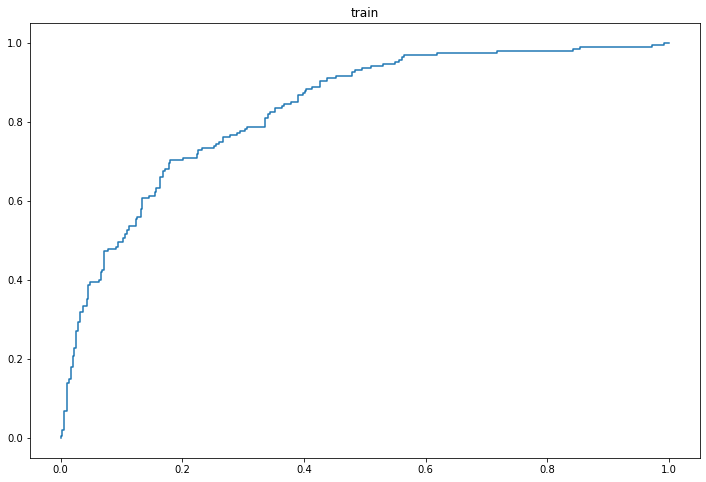

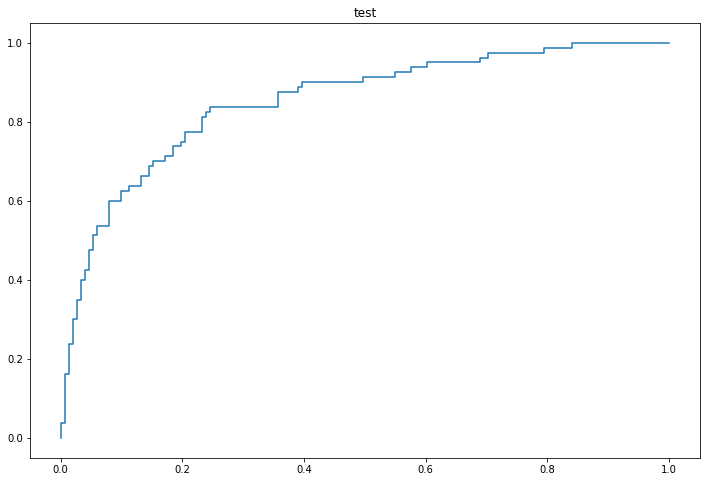

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(train_fpr, train_tpr)
plt.title('train')
plt.show()
plt.figure(figsize=(12, 8))
plt.plot(test_fpr, test_tpr)
plt.title('test')
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(true_training_label, predicted_training_label, average='binary')
test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(true_test_label, predicted_test_label, average='binary')

print(f'train precision: {train_precision}')
print(f'train recall: {train_recall}')
print(f'train fscore: {train_fscore}')
print(' ')

print(f'test precision: {test_precision}')
print(f'test recall: {test_recall}')
print(f'test fscore: {test_fscore}')


train precision: 0.7112676056338029
train recall: 0.5372340425531915
train fscore: 0.6121212121212121
 
test precision: 0.765625
test recall: 0.6125
test fscore: 0.6805555555555556


## Regulariztion

### L1 Regularization

In [ ]:
def print_metrics(classifier, threshold=0.5):
    predicted_training_score = classifier.predict_proba(train_data_x)[:, 1]
    predicted_training_label = predicted_training_score >= 0.5
    true_training_label = train_data_label >= 0.5
    train_acc = accuracy_score(true_training_label, predicted_training_label)
    print(f'train accuracy (at threshold {threshold}): {train_acc}')

    predicted_test_score = classifier.predict_proba(test_data_x)[:, 1]
    predicted_test_label = predicted_test_score >= 0.5
    true_test_label = test_data_label >= 0.5
    test_acc = accuracy_score(true_test_label, predicted_test_label)
    print(f'test accuracy (at threshold {threshold}): {test_acc}')

    train_confusion = confusion_matrix(true_training_label, predicted_training_label)
    print('')
    print('train confusion matrix:')
    print(train_confusion)
    print('')
    print('test confusion matrix:')
    test_confusion = confusion_matrix(true_test_label, predicted_test_label)
    print(test_confusion)

    train_fnr = train_confusion[1, 0] / (train_confusion[0, 0] + train_confusion[1, 0])
    train_fpr = train_confusion[0, 1] / (train_confusion[0, 1] + train_confusion[1, 1])

    print('')
    print(f'train: (at threshold {threshold})')
    print(f'FNR: {train_fnr}')
    print(f'FPR: {train_fpr}')

    test_fnr = test_confusion[1, 0] / (test_confusion[0, 0] + test_confusion[1, 0])
    test_fpr = test_confusion[0, 1] / (test_confusion[0, 1] + test_confusion[1, 1])

    print('')
    print(f'test: (at threshold {threshold})')
    print(f'FNR: {test_fnr}')
    print(f'FPR: {test_fpr}')

    train_fpr, train_tpr, train_thresholds = roc_curve(train_data_label, predicted_training_score)
    train_auc = auc(train_fpr, train_tpr)
    test_fpr, test_tpr, test_thresholds = roc_curve(test_data_label, predicted_test_score)
    test_auc = auc(test_fpr, test_tpr)

    print('')
    print(f'train auc: {train_auc}')
    print(f'test auc: {test_auc}')

    train_precision, train_recall, train_fscore, _ = precision_recall_fscore_support(true_training_label, predicted_training_label, average='binary')
    test_precision, test_recall, test_fscore, _ = precision_recall_fscore_support(true_test_label, predicted_test_label, average='binary')

    print('')
    print(f'train precision: {train_precision}')
    print(f'train recall: {train_recall}')
    print(f'train fscore: {train_fscore}')

    print('')
    print(f'test precision: {test_precision}')
    print(f'test recall: {test_recall}')
    print(f'test fscore: {test_fscore}')

In [ ]:
classifier = LogisticRegression(penalty='l1', C=0.1, solver='saga').fit(train_data_x, train_data_label)
print_metrics(classifier)

train accuracy (at threshold 0.5): 0.6778398510242085
test accuracy (at threshold 0.5): 0.7056277056277056

train confusion matrix:
[[315  34]
 [139  49]]

test confusion matrix:
[[137  14]
 [ 54  26]]

train: (at threshold 0.5)
FNR: 0.30616740088105726
FPR: 0.40963855421686746

test: (at threshold 0.5)
FNR: 0.28272251308900526
FPR: 0.35

train auc: 0.6677437054197403
test auc: 0.6858443708609272

train precision: 0.5903614457831325
train recall: 0.26063829787234044
train fscore: 0.36162361623616235

test precision: 0.65
test recall: 0.325
test fscore: 0.43333333333333335


### L2 Regularization

In [ ]:
classifier = LogisticRegression(penalty='l2', C=0.001).fit(train_data_x, train_data_label)
print_metrics(classifier)

train accuracy (at threshold 0.5): 0.7560521415270018
test accuracy (at threshold 0.5): 0.7878787878787878

train confusion matrix:
[[307  42]
 [ 89  99]]

test confusion matrix:
[[133  18]
 [ 31  49]]

train: (at threshold 0.5)
FNR: 0.22474747474747475
FPR: 0.2978723404255319

test: (at threshold 0.5)
FNR: 0.18902439024390244
FPR: 0.26865671641791045

train auc: 0.8182192281899653
test auc: 0.854387417218543

train precision: 0.7021276595744681
train recall: 0.526595744680851
train fscore: 0.601823708206687

test precision: 0.7313432835820896
test recall: 0.6125
test fscore: 0.6666666666666667


In [ ]:
classifier = LogisticRegression(penalty='elasticnet', C=0.001, l1_ratio=0.2, solver='saga').fit(train_data_x, train_data_label)
print_metrics(classifier)

train accuracy (at threshold 0.5): 0.6703910614525139
test accuracy (at threshold 0.5): 0.6796536796536796

train confusion matrix:
[[323  26]
 [151  37]]

test confusion matrix:
[[138  13]
 [ 61  19]]

train: (at threshold 0.5)
FNR: 0.31856540084388185
FPR: 0.4126984126984127

test: (at threshold 0.5)
FNR: 0.3065326633165829
FPR: 0.40625

train auc: 0.6334969212948851
test auc: 0.6702814569536424

train precision: 0.5873015873015873
train recall: 0.19680851063829788
train fscore: 0.2948207171314741

test precision: 0.59375
test recall: 0.2375
test fscore: 0.3392857142857143


## Model Validation & Selection

In [ ]:
train_data_percentage = 0.7
validation_data_percentage = 0.15
train_data_len = int(len(data_tensor) * train_data_percentage)
print(train_data_len)
validation_data_len = int(len(data_tensor) * validation_data_percentage)
print(validation_data_len)

537
115


In [ ]:
train_data = data_tensor[:train_data_len]
validation_data = data_tensor[train_data_len:train_data_len + validation_data_len]
test_data = data_tensor[train_data_len + validation_data_len:]

train_data_x = train_data[:, :-1]
train_data_label = train_data[:, -1]

validation_data_x = validation_data[:, :-1]
validation_data_label = validation_data[:, -1]

test_data_x = test_data[:, :-1]
test_data_label = test_data[:, -1]

In [ ]:
C_choices = [100, 10, 1, 0.1, 0.01, 0.001]

best_C = None
max_acc = -1

for C in C_choices:
    classifier = LogisticRegression(penalty='l2', C=C).fit(train_data_x, train_data_label)
    predicted_validation_score = classifier.predict_proba(validation_data_x)[:, 1]
    predicted_validation_label = predicted_validation_score >= 0.5
    true_validation_label = validation_data_label >= 0.5
    validation_acc = accuracy_score(true_validation_label, predicted_validation_label)
    print(f'C = {C}, validation accuracy = {validation_acc}')

    if validation_acc > max_acc:
        max_acc = validation_acc
        best_C = C

print('')
print(f'best C: {best_C}, max validation accuracy: {max_acc}')

C = 100, validation accuracy = 0.808695652173913
C = 10, validation accuracy = 0.8173913043478261
C = 1, validation accuracy = 0.8173913043478261
C = 0.1, validation accuracy = 0.8173913043478261
C = 0.01, validation accuracy = 0.8521739130434782
C = 0.001, validation accuracy = 0.8173913043478261

best C: 0.01, max validation accuracy: 0.8521739130434782


In [ ]:
classifier = LogisticRegression(penalty='l2', C=best_C).fit(train_data_x, train_data_label)
predicted_test_score = classifier.predict_proba(test_data_x)[:, 1]
predicted_test_label = predicted_test_score >= 0.5
true_test_label = test_data_label >= 0.5
test_acc = accuracy_score(true_test_label, predicted_test_label)
print(f'test accuracy: {test_acc}')

test accuracy: 0.7672413793103449


### k-fold cross-validation

In [ ]:
train_data_percentage = 0.85
train_data_len = int(len(data_tensor) * train_data_percentage)

train_data = data_tensor[:train_data_len]
test_data = data_tensor[train_data_len:]

test_data_x = test_data[:, :-1]
test_data_label = test_data[:, -1]

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(10)

C_choices = [100, 10, 1, 0.1, 0.01, 0.001]

best_C = None
max_acc = -1

for C in C_choices:
    validation_accuracies = []
    for train_data_fold, validation_data_fold in kfold.split(train_data):
        train_data_x = train_data[train_data_fold][:, :-1]
        train_data_label = train_data[train_data_fold][:, -1]

        validation_data_x = train_data[validation_data_fold][:, :-1]
        validation_data_label = train_data[validation_data_fold][:, -1]

        classifier = LogisticRegression(penalty='l2', C=C).fit(train_data_x, train_data_label)
        predicted_validation_score = classifier.predict_proba(validation_data_x)[:, 1]
        predicted_validation_label = predicted_validation_score >= 0.5
        true_validation_label = validation_data_label >= 0.5
        validation_acc = accuracy_score(true_validation_label, predicted_validation_label)
        validation_accuracies.append(validation_acc)

    average_validation_accuracy = np.mean(validation_accuracies)
    print(f'C = {C}, k-fold average validation accuracy = {average_validation_accuracy}')

    if average_validation_accuracy > max_acc:
        max_acc = average_validation_accuracy
        best_C = C

print('')
print(f'best C: {best_C}, max k-fold average validation accuracy: {max_acc}')

C = 100, k-fold average validation accuracy = 0.7776456876456876
C = 10, k-fold average validation accuracy = 0.7715384615384615
C = 1, k-fold average validation accuracy = 0.7806993006993007
C = 0.1, k-fold average validation accuracy = 0.7700699300699301
C = 0.01, k-fold average validation accuracy = 0.763916083916084
C = 0.001, k-fold average validation accuracy = 0.7622843822843823

best C: 1, max k-fold average validation accuracy: 0.7806993006993007


In [ ]:
train_data_x = train_data[:, :-1]
train_data_label = train_data[:, -1]

classifier = LogisticRegression(penalty='l2', C=best_C).fit(train_data_x, train_data_label)
predicted_test_score = classifier.predict_proba(test_data_x)[:, 1]
predicted_test_label = predicted_test_score >= 0.5
true_test_label = test_data_label >= 0.5
test_acc = accuracy_score(true_test_label, predicted_test_label)
print(f'test accuracy: {test_acc}')

test accuracy: 0.7758620689655172


### feature subset selection

In [ ]:
from itertools import combinations

train_data_percentage = 0.7
validation_data_percentage = 0.15
train_data_len = int(len(data_tensor) * train_data_percentage)
validation_data_len = int(len(data_tensor) * validation_data_percentage)

k = data_tensor.shape[1] - 1

best_deleted_parameters = None
best_validation_accuracy = -1

for r in range(0, k - 2):
    for deleted_parameters in combinations(list(range(k)), r):
        if len(deleted_parameters) == 0:
            new_data_tensor = np.array(data_tensor)
        else:
            new_data_tensor = np.delete(data_tensor, deleted_parameters, 1)

        train_data = new_data_tensor[:train_data_len]
        validation_data = new_data_tensor[train_data_len:train_data_len + validation_data_len]

        train_data_x = train_data[:, :-1]
        train_data_label = train_data[:, -1]

        validation_data_x = validation_data[:, :-1]
        validation_data_label = validation_data[:, -1]

        classifier = LogisticRegression().fit(train_data_x, train_data_label)

        predicted_validation_score = classifier.predict_proba(validation_data_x)[:, 1]
        predicted_validation_label = predicted_validation_score >= 0.5
        true_validation_label = validation_data_label >= 0.5
        validation_acc = accuracy_score(true_validation_label, predicted_validation_label)

        if validation_acc > best_validation_accuracy:
            best_validation_accuracy = validation_acc
            best_deleted_parameters = deleted_parameters

print(f'best validation accuracy: {best_validation_accuracy}, parameters deleted: {best_deleted_parameters}')

best validation accuracy: 0.7652173913043478, parameters deleted: (0, 7)


In [ ]:
if len(best_deleted_parameters) == 0:
    new_data_tensor = np.array(data_tensor)
else:
    new_data_tensor = np.delete(data_tensor, best_deleted_parameters, 1)

train_data = new_data_tensor[:train_data_len]
test_data = new_data_tensor[train_data_len + validation_data_len:]

train_data_x = train_data[:, :-1]
train_data_label = train_data[:, -1]
test_data_x = test_data[:, :-1]
test_data_label = test_data[:, -1]

classifier = LogisticRegression().fit(train_data_x, train_data_label)

predicted_test_score = classifier.predict_proba(test_data_x)[:, 1]
predicted_test_label = predicted_test_score >= 0.5
true_test_label = test_data_label >= 0.5
test_acc = accuracy_score(true_test_label, predicted_test_label)
print(f'test accuracy: {test_acc}')

test accuracy: 0.7327586206896551
